In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('NBI_processed.csv')
data.head()

State  Year      Slab  MultiBeam  GirderFloorBeamSystem   TeaBeam  \
0     ALABAMA  1992  0.326781   0.257628               0.292597  0.417426   
1      ALASKA  1992  0.082470   0.268559               0.115272  0.172852   
2     ARIZONA  1992  0.183139   0.177047               0.096338  0.224856   
3    ARKANSAS  1992  0.170860   0.329185               0.222030  0.323595   
4  CALIFORNIA  1992  0.218799   0.497345               0.885631  0.344593   

   BoxBeamMultiple  ArchDeck   Culvert  TrussThru     Frame  BoxBeamSingle  \
0         0.299461  0.850491  0.134380   0.887495  0.851453       0.014134   
1         0.264056  0.141922  1.000000   0.494670  0.137405       0.000000   
2         0.137023  0.320507  0.061438   0.927453  0.197519       0.087231   
3         0.192091  0.369497  0.054384   0.672889  0.131139       0.000000   
4         0.342176  0.623282  0.126319   0.941477  0.000000       0.000000   

   TrussDeck  
0   0.805998  
1   0.030212  
2   0.413820  
3   0.586634  
4   0.621819

There is no need for normalization since the variables are already in the same scale

# Hierarchical Clustering

Hierarchical Clustering with data from one year

In [3]:
import scipy.cluster.hierarchy as shc
def plot_dendogram(data):    
    plt.figure(figsize=(15, 7))  
    plt.title("Dendrograms")  
    plt.xlabel('State')
    plt.ylabel('Distance')
    dend = shc.dendrogram(shc.linkage(data, method='ward'),
                         labels = data.index,
                         leaf_rotation=90.,  # rotates the x axis labels
                         leaf_font_size=8.,  # font size for the x axis labels                        
                         )
    plt.show()
    return dend
    
def plot_dendogram_with_treshold(data, treshold):   
    plt.figure(figsize=(15, 7))  
    plt.title("Dendrograms")  
    plt.xlabel('State')
    plt.ylabel('Distance')
    dend = shc.dendrogram(shc.linkage(data, method='ward'),
                         labels = data.index,
                         leaf_rotation=90.,  # rotates the x axis labels
                         leaf_font_size=8.,  # font size for the x axis labels                        
                         )
    plt.axhline(y=treshold, color='r', linestyle='--');
    
    pass

Dendogram for the first most recent year (2013)

In [4]:
data0 = data[data['Year'] == 2013]
data0.set_index('State', inplace = True)

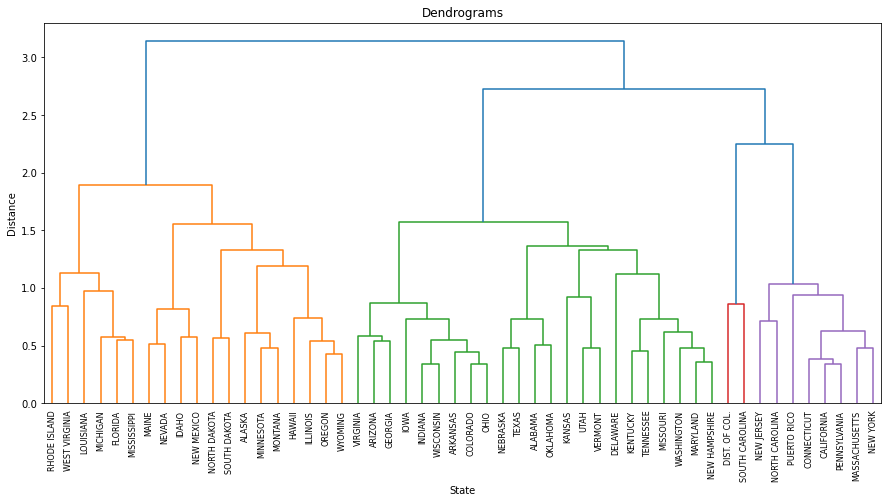

In [5]:
dend2013 = plot_dendogram(data0)

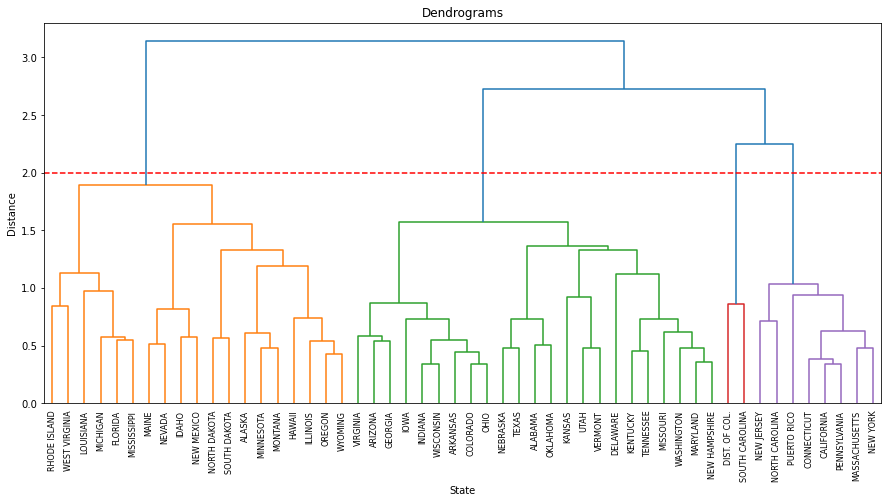

In [6]:
plot_dendogram_with_treshold(data0, 2.0)

Dendogram for the second most recent year (2012)

In [7]:
data01 = data[data['Year'] == 2012]
data01.set_index('State', inplace = True)

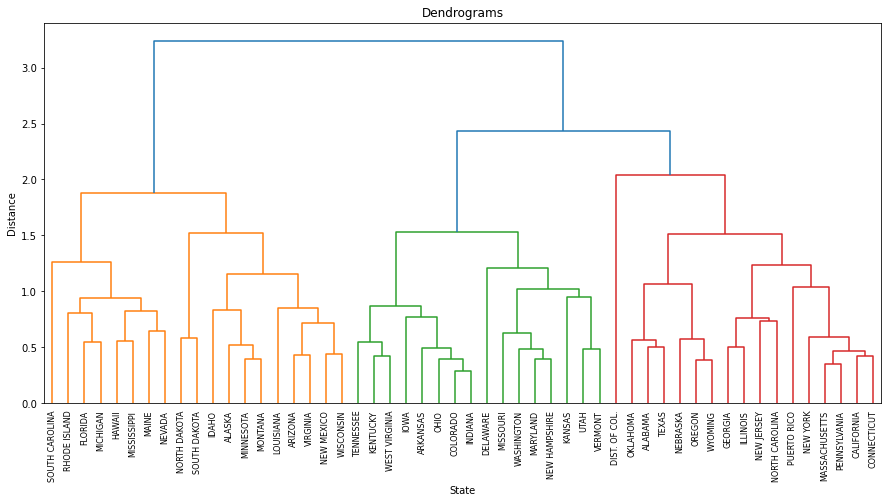

In [8]:
dend2012 = plot_dendogram(data01)

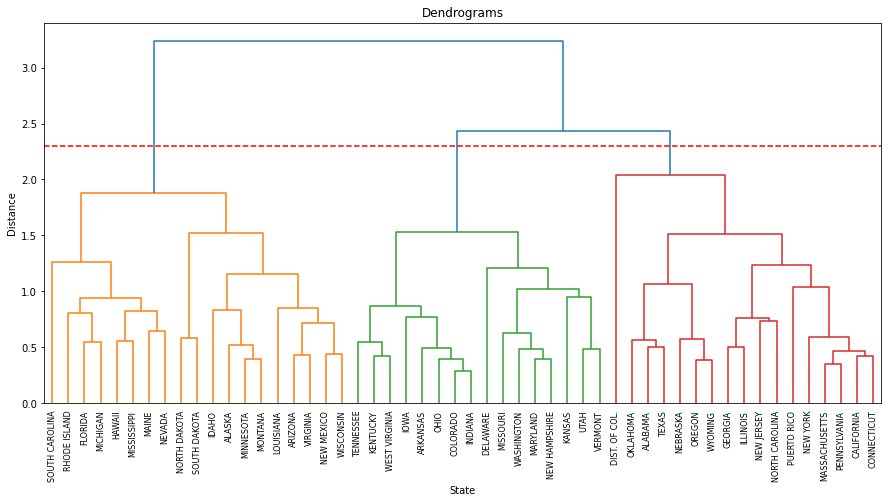

In [9]:
plot_dendogram_with_treshold(data01, 2.3)

Dendogram for the first all years

In [10]:
data1 = data.copy()
data1.set_index('State', inplace = True)

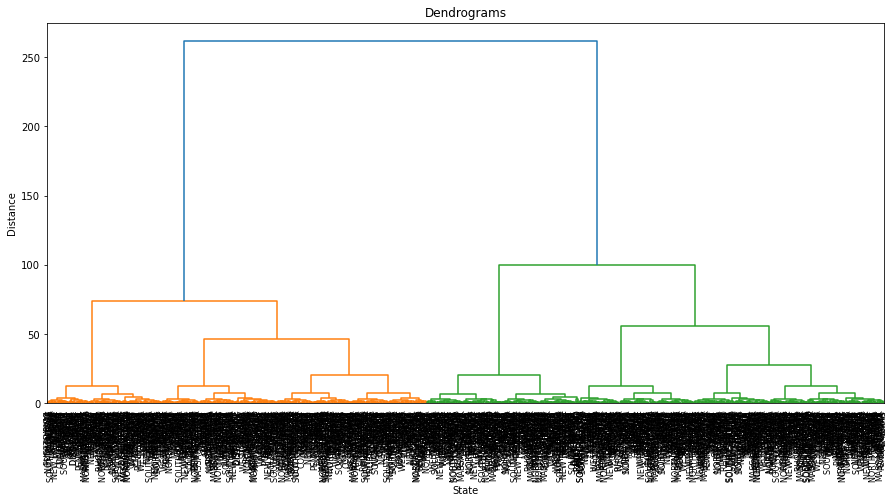

In [11]:
dendALL = plot_dendogram(data1)

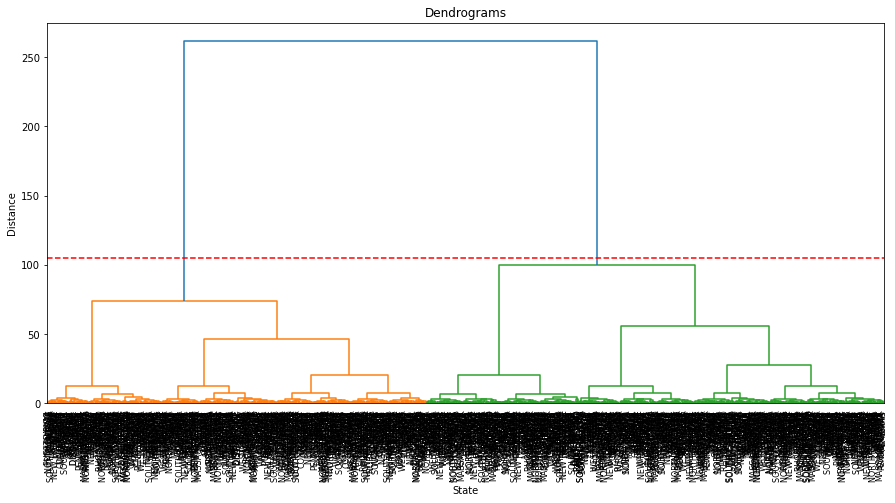

In [12]:
plot_dendogram_with_treshold(data1, 105)

# Agglomerative Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering
def agglomerative_clust(data, n_clusters):
    cluster = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward')  
    labels = cluster.fit_predict(data)
    
    return cluster, labels

In [14]:
# cluster0, labels0 = agglomerative_clust(data0, 3)

In [53]:
cluster1, labels1 = agglomerative_clust(data1, 2)
print(len(labels1))
labels1

# change all O to 2, representing class 2.

for i in range(len(labels1)):
    if labels1[i] == 0:
        labels1[i] = 2
        
labels1[600:1000]

1144


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [54]:
(unique, counts) = np.unique(labels1, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  1, 519],
       [  2, 625]], dtype=int64)

In [55]:
# plt.figure(figsize=(10, 7))  
# plt.scatter(data1['Slab'], data1['MultiBeam'], c=cluster1.labels_) 

In [59]:
data1['Label'] = labels1
data1.tail()

Year      Slab  MultiBeam  GirderFloorBeamSystem   TeaBeam  \
State                                                                       
WASHINGTON     2013  0.331335   0.276044               0.544119  0.338060   
WEST VIRGINIA  2013  0.463707   0.211753               0.404103  0.567596   
WISCONSIN      2013  0.099642   0.148156               0.291008  0.268167   
WYOMING        2013  0.295514   0.229977               0.460110  0.209414   
PUERTO RICO    2013  0.762105   0.361738               0.551498  0.604508   

               BoxBeamMultiple  ArchDeck   Culvert  TrussThru     Frame  \
State                                                                     
WASHINGTON            0.438852  0.392112  0.204236   0.514098  0.168329   
WEST VIRGINIA         0.214580  0.565835  0.529438   0.327008  0.282401   
WISCONSIN             0.265487  0.376592  0.049099   0.700330  0.387879   
WYOMING               0.361643  0.655923  0.074208   0.884684  0.413407   
PUERTO RICO           0.431512  1.000000  0.377161   0.765314  0.503061   

               BoxBeamSingle  TrussDeck  Label  
State                                           
WASHINGTON          0.525696   0.851734      2  
WEST VIRGINIA       0.144358   0.226640      2  
WISCONSIN           0.000000   0.633531      2  
WYOMING             0.283124   0.258494      2  
PUERTO RICO         0.113042   0.604385      2

# K-Means

In [60]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(2)
# kmeans.fit(data1)

# # labels0 = kmeans.fit_predict(data0)
# labels1 = kmeans.fit_predict(data1)

These labels can be added to the dataframe.

In [44]:
# # data0['Label'] = labels0
# data1['Label'] = labels1
# data1.head()

In [45]:
# (unique, counts) = np.unique(labels1, return_counts=True)
# frequencies = np.asarray((unique, counts)).T
# frequencies

In [61]:
# Export the dataframe as a .csv file ready for modeling.
data1.to_csv("data_with_labels.csv", index = True, encoding="utf-8")

# Visualization (Bivariate)

In [21]:
# data_ = data[data['Year'] == 2013]
# data0.set_index('State', inplace = True)

In [ ]:
# sns.scatterplot(x = 'State', y = 'MultiBeam', data = data0, hue='Label')

<AxesSubplot:xlabel='Slab', ylabel='MultiBeam'>

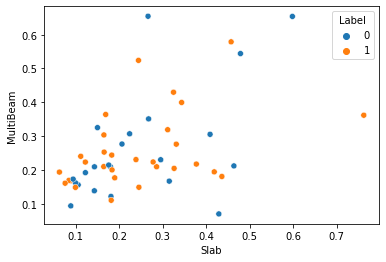

In [22]:
sns.scatterplot(x = 'Slab', y = 'MultiBeam', data = data0, hue='Label')

<AxesSubplot:xlabel='Slab', ylabel='MultiBeam'>

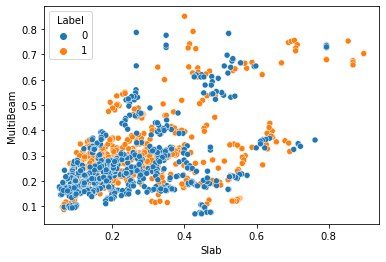

In [23]:
sns.scatterplot(x = 'Slab', y = 'MultiBeam', data = data1, hue='Label')

The clusters are not obvious because a lot of superposition exists in the data due to the values being between 0 and 1 for all data point.

# Visualization (Multivariate)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


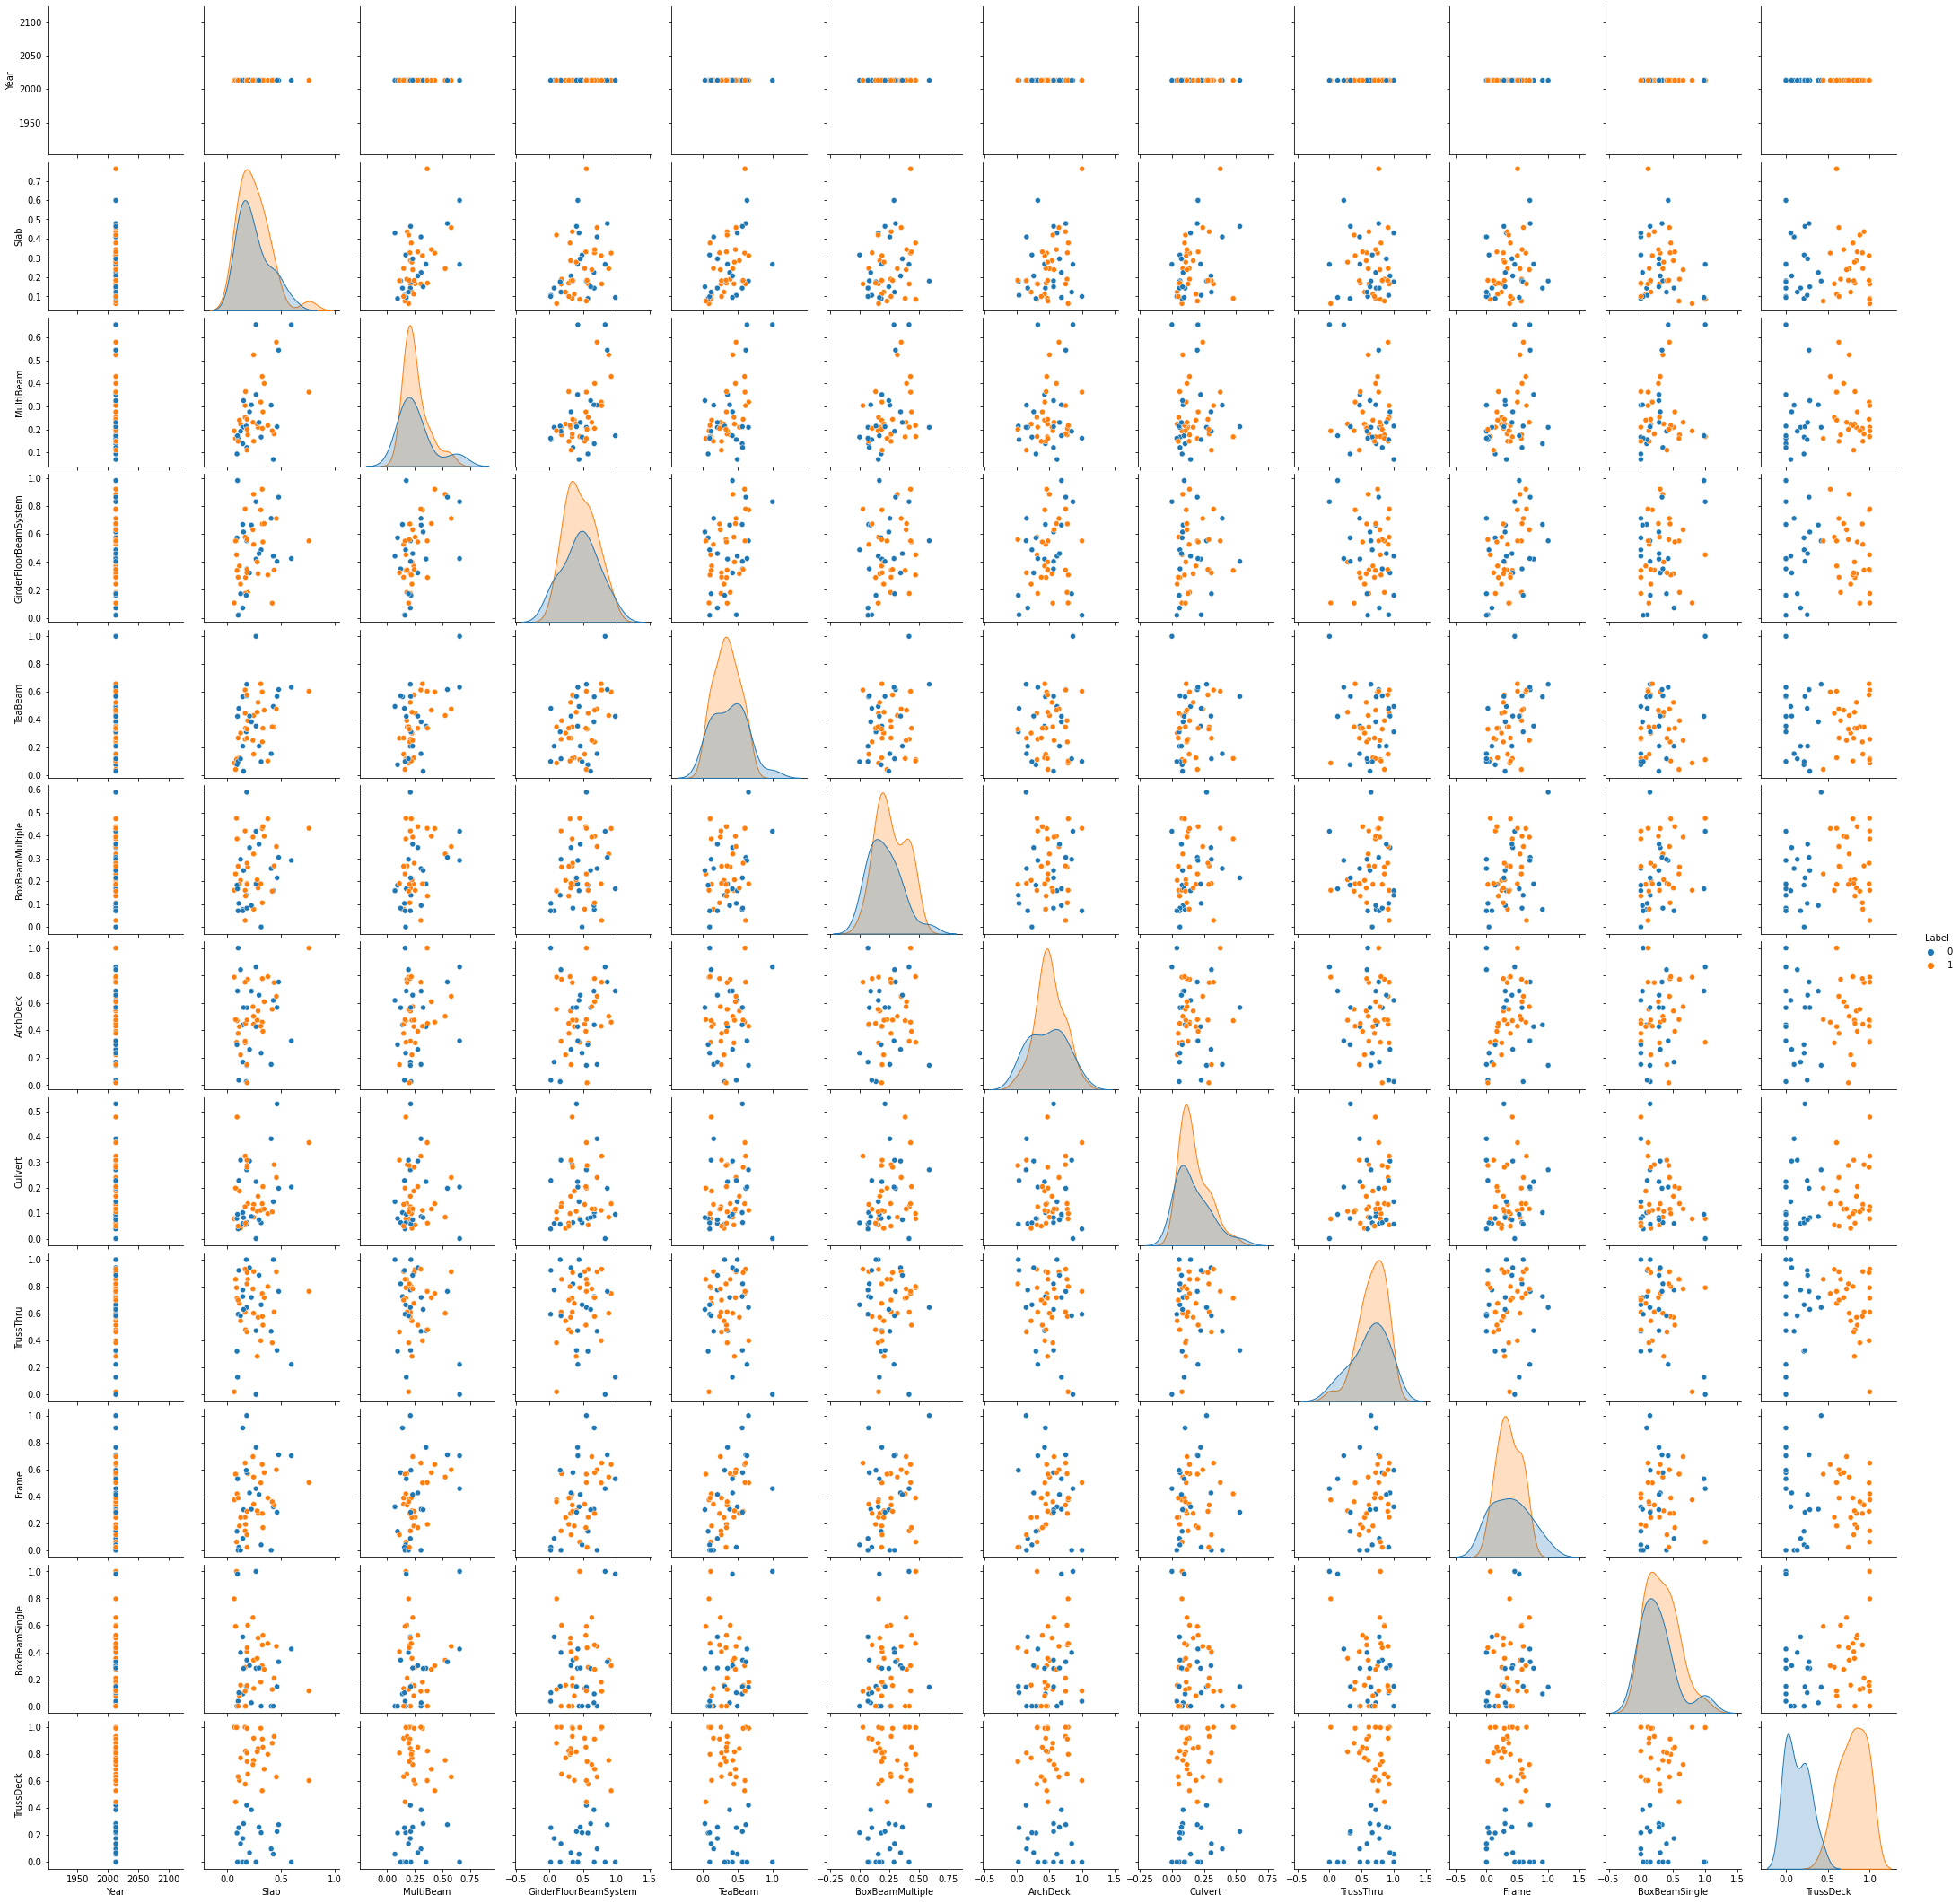

In [24]:
sns.pairplot(data0,hue='Label');

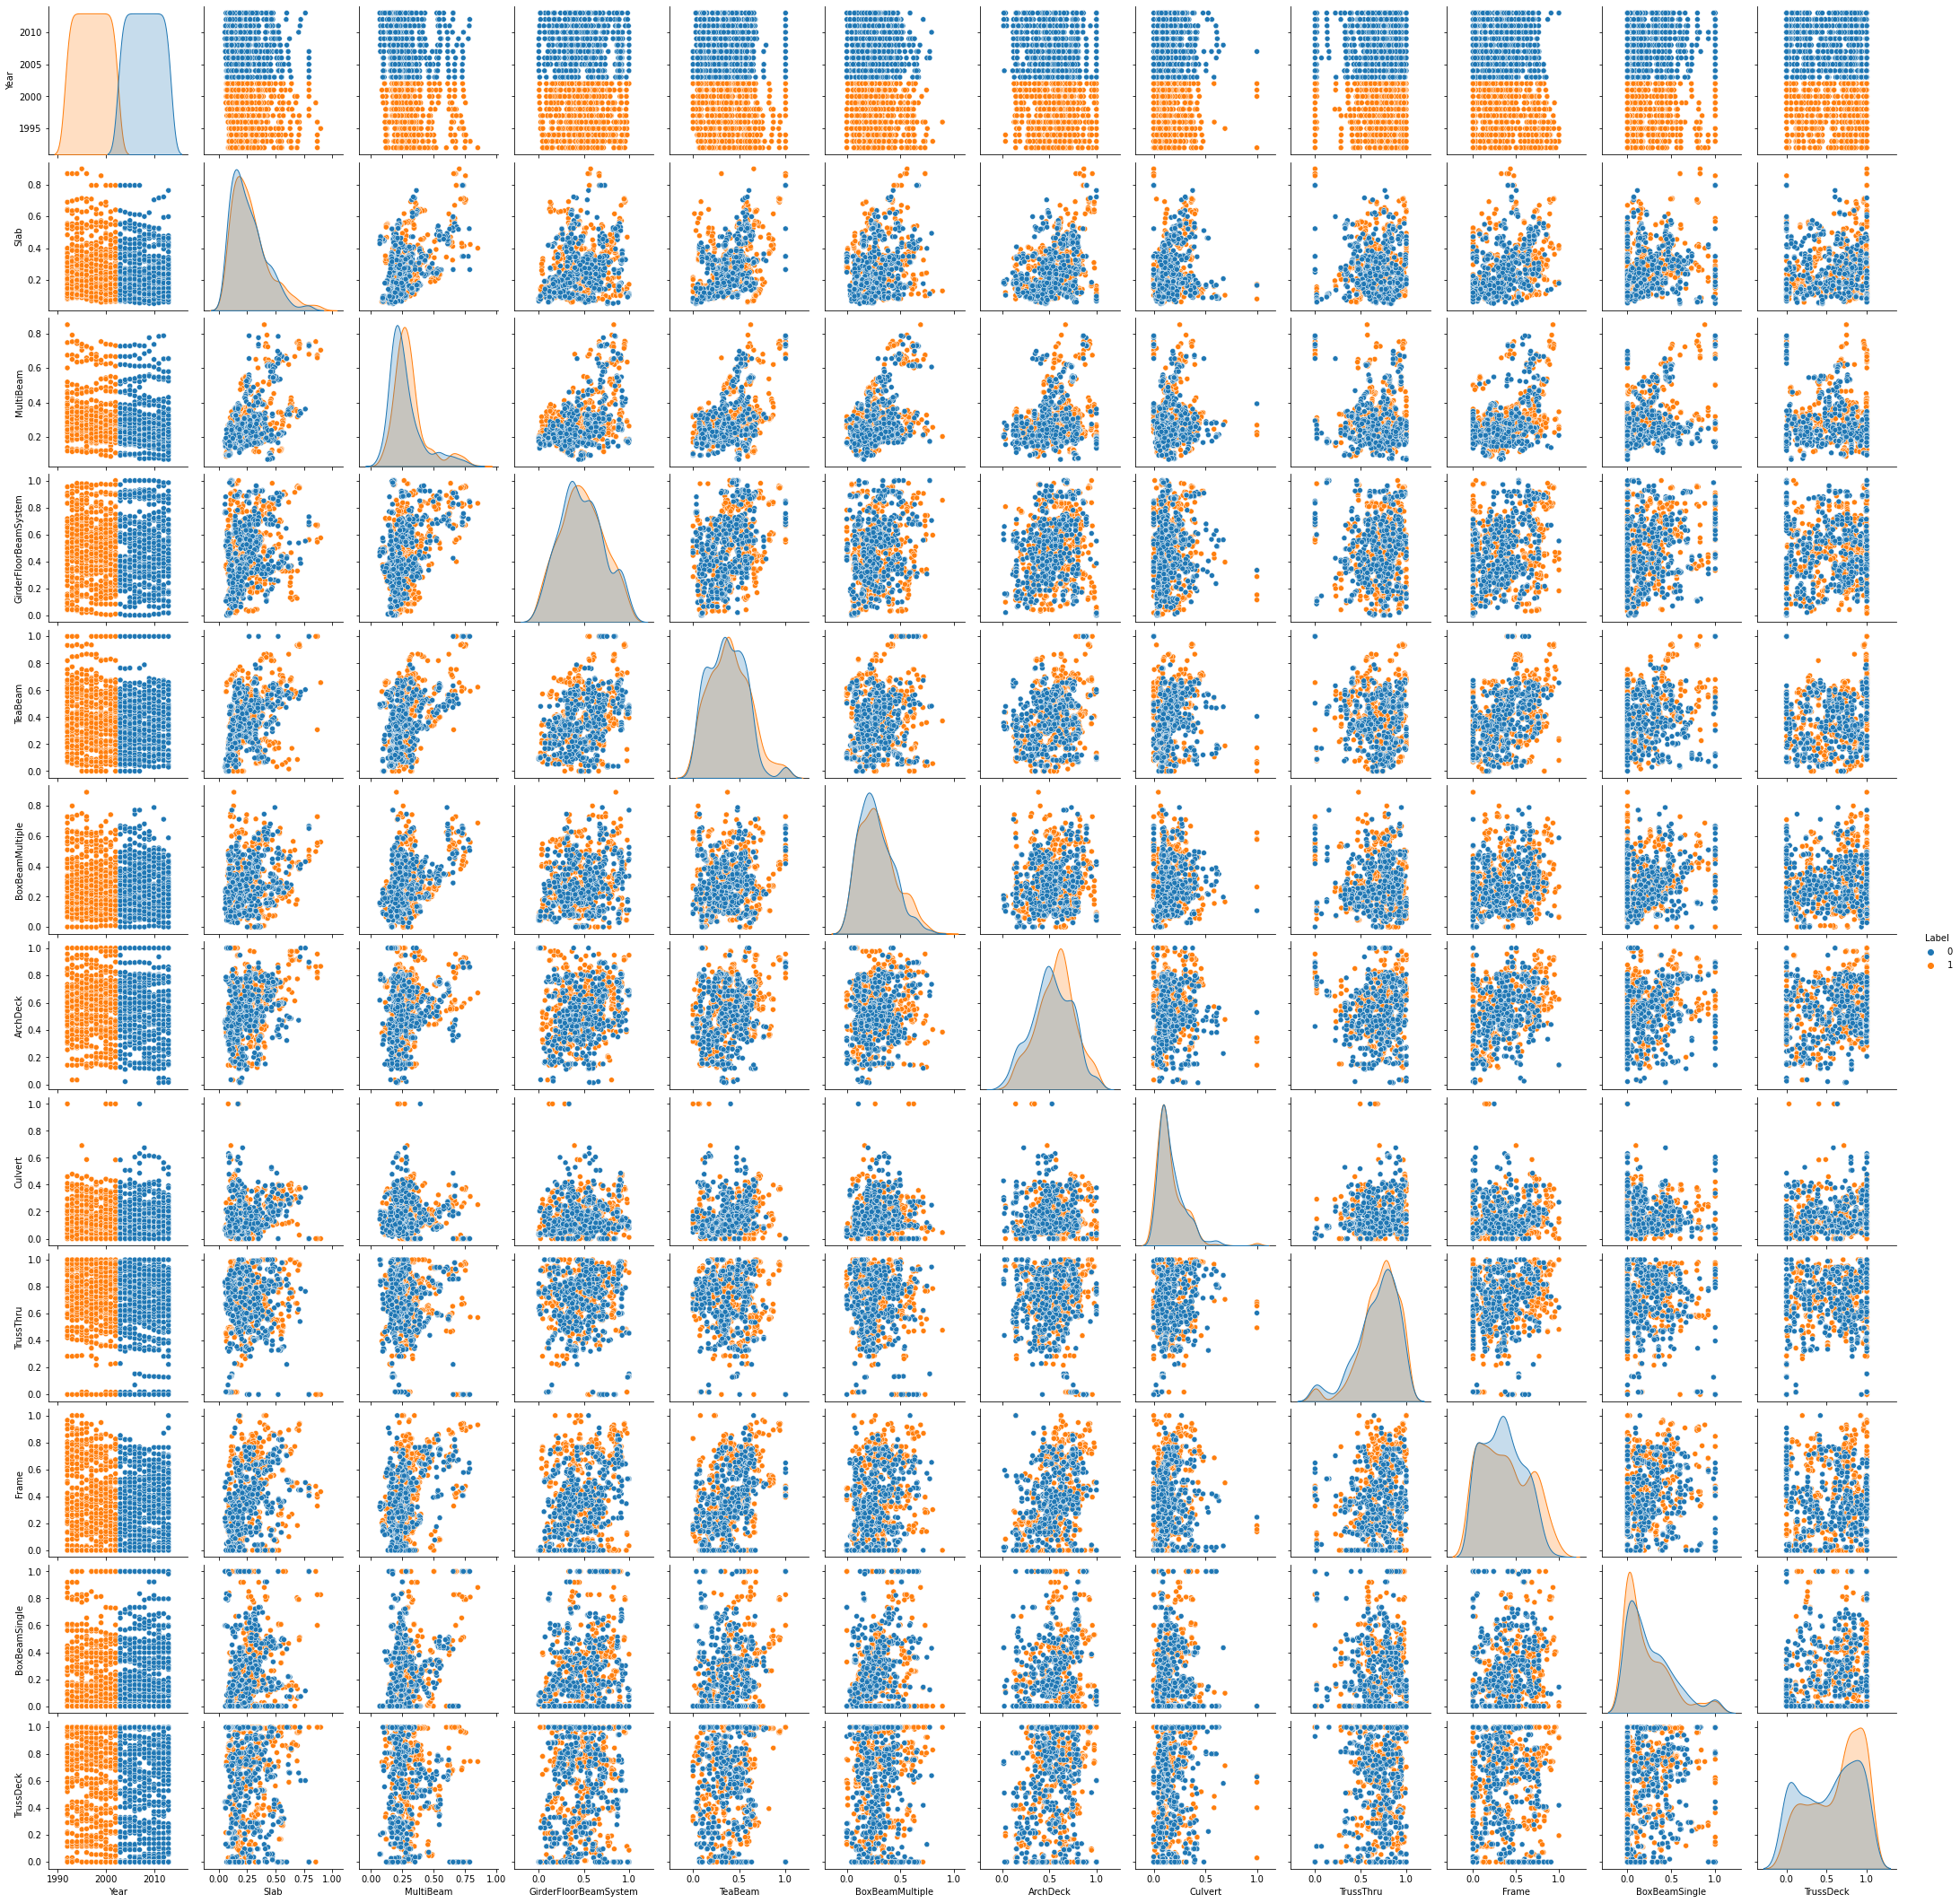

In [25]:
sns.pairplot(data1,hue='Label');

## References:

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

https://stackoverflow.com/questions/50695226/how-to-get-the-optimal-number-of-clusters-using-hierarchical-cluster-analysis-au

https://www.kaggle.com/code/ellecf/visualizing-multidimensional-clusters/notebook